In [349]:
import numpy as np
from PIL import Image
import os

FILES_DIR = os.path.abspath('tmp')

In [350]:
def limiarSegmentation(image, limiars):
    grayImage = np.asarray(image.convert('L')).astype(np.uint8)
    image = np.asarray(image.convert('RGB')).astype(np.uint8)
    
    segmentedImages = [np.full((image.shape[0], image.shape[1], image.shape[2]), 255) for i in range(len(limiars))]

    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            for i, limiar in enumerate(limiars):
                if grayImage[y, x] <= limiar:
                    segmentedImages[i][y, x] = image[y, x]
                    grayImage[y, x] = limiar
                    break

    print('Níveis de Cinza:')
    grayImage = Image.fromarray(grayImage)

    grayImage.save(f'{FILES_DIR}/segmented/graySegmentedImage.jpg')
    grayImage.show()

    print('Segmentações:')
    for i, segmentedImage in enumerate(segmentedImages):
        segmentedImage = Image.fromarray(segmentedImage.astype(np.uint8))

        segmentedImage.save(f'{FILES_DIR}/segmented/segmentedImage_{i}.jpg')
        segmentedImage.show()


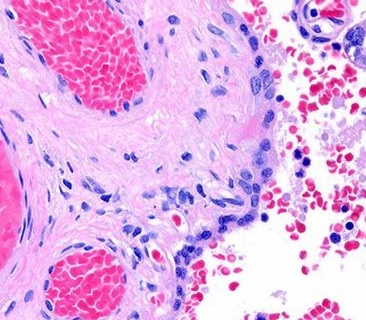

Níveis de Cinza:


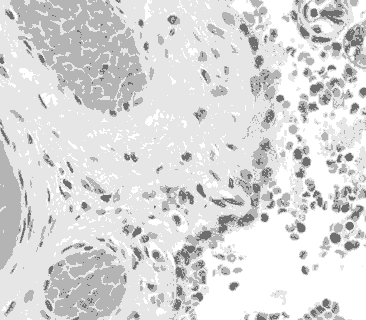

Segmentações:


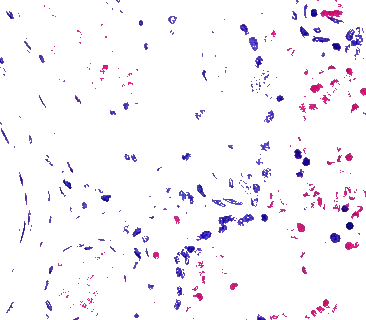

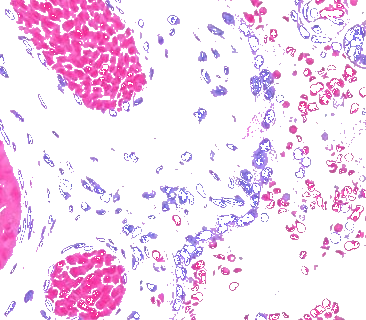

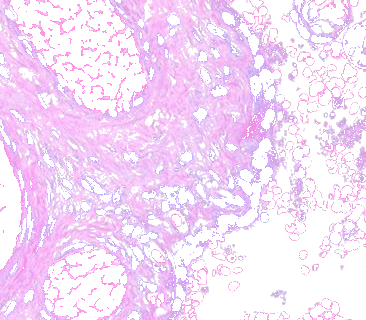

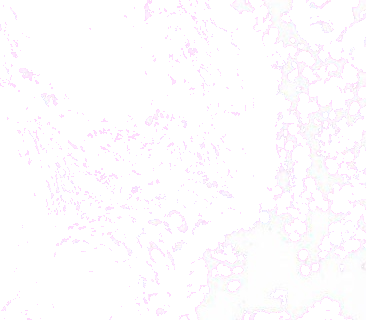

In [351]:
os.makedirs(f'{FILES_DIR}/segmented/', exist_ok = True)

imageName = 'image.jpg'
limiars = [110, 180, 230, 255]

image = Image.open(f'{FILES_DIR}/original/{imageName}')
image.show()

segmentedImage = limiarSegmentation(image, limiars)